In [2]:
import pandas as pd
import numpy as np

bau2025 = pd.read_csv('Total Load Profiles/published_load_data/total_loads/Total_Loads_NetZeroNoCCS_Climate_2050.csv')
ciso_bau2025 = bau2025.loc[bau2025['BA'] == 'CISO']
total_load_max = ciso_bau2025['Total_Load_MWh'].max()
print("Maximum total load")
print(total_load_max)

total_load_maxpos = ciso_bau2025['Total_Load_MWh'].idxmax()
print("Maximum total load position")
print(total_load_maxpos)

# Number is from bau2025 position
total_load_maxdate = bau2025.iloc[total_load_maxpos].loc['Time_UTC']
print("Maximum total load date")
print(total_load_maxdate)

total_load_transport = bau2025.iloc[total_load_maxpos].loc['Transportation_Load_MWh']
print("Maximum total load's transportation load")
print(total_load_transport)

# need to figure out how to loop and print multiple BAs and multiple sheets

Maximum total load
136336.12
Maximum total load position
49489
Maximum total load date
2050-08-26 01:00:00
Maximum total load's transportation load
17909.67


In [18]:
def totalLoadPeak(loadData):
    bau2025 = loadData
    BA_LIST = ['AVA', 'AZPS', 'BANC', 'BPAT', 'CHPD', 'CISO', 'DOPD', 'EPE', 'GCPD', 'IID', 'IPCO', 'LDWP', 'NEVP', 'NWMT', 'PACE', 'PACW', 
               'PGE', 'PNM', 'PSCO', 'PSEI', 'SCL', 'SRP', 'TEPC', 'TIDC', 'TPWR', 'WACM', 'WALC', 'WAUW']
    print("Using an array to plot every BA total load data")
    print()
    
    totloadmax = []
    totloaddate = []
    totloadtransport = []

    for ba in BA_LIST:
        # print('Balancing Authority: ' + ba)
        ba_bau2025 = bau2025.loc[bau2025['BA'] == ba]
        total_load_max = ba_bau2025['Total_Load_MWh'].max()
        # print("Maximum total load")
        # print(total_load_max)

        total_load_maxpos = ba_bau2025['Total_Load_MWh'].idxmax()
        # print("Maximum total load position")
        # print(total_load_maxpos)

        # Number is from bau2025 position
        total_load_maxdate = bau2025.iloc[total_load_maxpos].loc['Time_UTC']
        # print("Maximum total load date")
        # print(total_load_maxdate)

        total_load_transport = bau2025.iloc[total_load_maxpos].loc['Transportation_Load_MWh']
        # print("Maximum total load's transportation load")
        # print(total_load_transport)
        # print()

        #Adding the values into arrays
        totloadmax.append(total_load_max)
        totloaddate.append(total_load_maxdate)
        totloadtransport.append(total_load_transport)
        
    # turn the data into a dictionary
    totDict = {'BA' : BA_LIST, 
               'Time_UTC' : totloaddate, 
               'Total_Load_MWh' : totloadmax, 
               'Transportation_Load_MWh' : totloadtransport}
    return totDict

In [4]:
# turn the data into a dictionary
totDict = {'BA' : BA_LIST, 
           'Time_UTC' : totloaddate, 
           'Total_Load_MWh' : totloadmax, 
           'Transportation_Load_MWh' : totloadtransport}
# upload data into a csv file
total_load_penetration_data = pd.DataFrame(totDict)
total_load_penetration_data.to_csv("total_load_penetration_data.csv", index=False)
total_load_penetration_data
# plot the data over time

,BA,Time_UTC,Total_Load_MWh,Transportation_Load_MWh
0,AVA,2025-02-04 17:00:00,2751.21,39.89
1,AZPS,2025-07-08 01:00:00,8787.15,534.34
2,BANC,2025-07-10 01:00:00,5507.06,236.70
3,BPAT,2025-02-04 16:00:00,12225.94,275.16
4,CHPD,2025-02-04 16:00:00,546.13,6.32
5,CISO,2025-07-09 01:00:00,61396.52,3130.36
6,DOPD,2025-02-03 16:00:00,404.19,1.25
7,EPE,2025-06-17 23:00:00,1892.92,43.38
8,GCPD,2025-07-10 00:00:00,1064.28,7.09
9,IID,2025-07-02 01:00:00,1688.16,421.65


In [1]:
import pandas as pd
import numpy as np

bau_rcp45cooler_wecc2025 = pd.read_csv('Transportation Electrification Load Profiles/BAU_Climate/rcp45cooler/wecc_hourly_transportation_load_BAU_Climate_rcp45cooler_2025.csv')
# Split the data into months and seasons
bau_rcp45cooler_wecc2025['time'] = pd.to_datetime(bau_rcp45cooler_wecc2025['time'])
#display(bau_rcp45cooler_wecc2025)

totloadmax = pd.DataFrame(columns = bau_rcp45cooler_wecc2025.columns)

for i in range(12):
    month = bau_rcp45cooler_wecc2025.loc[(bau_rcp45cooler_wecc2025['time'].dt.month==i+1)]
    maxPos = month['transportation_load_MWh'].idxmax()
    selection = bau_rcp45cooler_wecc2025.loc[maxPos:maxPos]
    # issue that the data once found is turned into rows of single data
    # Fixed by turning the location into a range?
    totloadmax = pd.concat([totloadmax, selection])

totloadmax

,Unnamed: 0,time,passenger_rail_load_MWh,freight_rail_load_MWh,aviation_load_MWh,ship_load_MWh,HDV_load_MWh,MDV_load_MWh,LDV_load_MWh,transportation_load_MWh
721,721,2025-01-31 02:00:00+00:00,155.53069,35.785257,0.0,0.0,750.501109,344.049708,7370.168407,8656.035171
817,817,2025-02-04 02:00:00+00:00,155.53069,35.785257,0.0,0.0,1497.646555,169.081536,7591.899273,9449.943311
1417,1417,2025-03-01 02:00:00+00:00,155.53069,35.785257,0.0,0.0,1497.646555,169.081536,6629.074185,8487.118223
2665,2665,2025-04-22 02:00:00+00:00,155.53069,35.785257,0.0,0.0,1533.811283,311.824612,6589.575468,8626.527310
2881,2881,2025-05-01 02:00:00+00:00,155.53069,35.785257,0.0,0.0,1533.811283,311.824612,6200.337461,8237.289303
4273,4273,2025-06-28 02:00:00+00:00,155.53069,35.785257,0.0,0.0,870.654070,592.479320,6635.089648,8289.538986
4537,4537,2025-07-09 02:00:00+00:00,155.53069,35.785257,0.0,0.0,523.650780,582.872269,7083.695894,8381.534890
5690,5690,2025-08-26 03:00:00+00:00,155.53069,35.785257,0.0,0.0,688.786595,1434.961653,6312.626350,8627.690545
6409,6409,2025-09-25 02:00:00+00:00,155.53069,35.785257,0.0,0.0,1657.963190,868.372046,6303.012354,9020.663538
6553,6553,2025-10-01 02:00:00+00:00,155.53069,35.785257,0.0,0.0,1657.963190,868.372046,6264.811543,8982.462727


In [19]:
import pandas as pd
import numpy as np

# running multiple files from a folder path
total_load = 'Total Load Profiles/published_load_data/total_loads/Total_Loads_'
GCAM = ['BAU_Climate_', 'NetZeroNoCCS_Climate_']
years = ['2025', '2035', '2050']

for path in GCAM:
    for year in years:
        file = pd.read_csv(total_load + path + year + '.csv')
        # display(file)
        # manipulating and saving each file
        # For Part 1 
        dataDict = totalLoadPeak(file)
        # upload data into a csv file
        total_load_penetration_data = pd.DataFrame(dataDict)
        total_load_penetration_data.to_csv(path + year + '_total_load_penetration_data.csv', index=False)
        
        

,BA,Time_UTC,Non-Transportation_Load_MWh,Transportation_Load_MWh,Total_Load_MWh
0,AVA,2025-01-01 00:00:00,2179.79,48.82,2228.61
1,AVA,2025-01-01 01:00:00,2264.92,56.37,2321.29
2,AVA,2025-01-01 02:00:00,2336.19,51.71,2387.90
3,AVA,2025-01-01 03:00:00,2383.70,44.19,2427.89
4,AVA,2025-01-01 04:00:00,2338.14,38.78,2376.92
...,...,...,...,...,...
245275,WAUW,2025-12-31 19:00:00,90.18,10.18,100.36
245276,WAUW,2025-12-31 20:00:00,90.02,10.31,100.33
245277,WAUW,2025-12-31 21:00:00,90.12,13.70,103.82
245278,WAUW,2025-12-31 22:00:00,90.83,15.81,106.64


Using an array to plot every BA total load data
Balancing Authority: AVA
Maximum total load
2751.21
Maximum total load position
833
Maximum total load date
2025-02-04 17:00:00
Maximum total load's transportation load
39.89

Balancing Authority: AZPS
Maximum total load
8787.15
Maximum total load position
13273
Maximum total load date
2025-07-08 01:00:00
Maximum total load's transportation load
534.34

Balancing Authority: BANC
Maximum total load
5507.06
Maximum total load position
22081
Maximum total load date
2025-07-10 01:00:00
Maximum total load's transportation load
236.7

Balancing Authority: BPAT
Maximum total load
12225.94
Maximum total load position
27112
Maximum total load date
2025-02-04 16:00:00
Maximum total load's transportation load
275.16

Balancing Authority: CHPD
Maximum total load
546.13
Maximum total load position
35872
Maximum total load date
2025-02-04 16:00:00
Maximum total load's transportation load
6.32

Balancing Authority: CISO
Maximum total load
61396.52
Maxim

,BA,Time_UTC,Non-Transportation_Load_MWh,Transportation_Load_MWh,Total_Load_MWh
0,AVA,2035-01-01 00:00:00,2164.61,193.55,2358.16
1,AVA,2035-01-01 01:00:00,2233.05,197.90,2430.95
2,AVA,2035-01-01 02:00:00,2297.70,188.67,2486.37
3,AVA,2035-01-01 03:00:00,2347.51,174.66,2522.17
4,AVA,2035-01-01 04:00:00,2310.14,164.17,2474.31
...,...,...,...,...,...
245275,WAUW,2035-12-31 19:00:00,108.42,26.22,134.64
245276,WAUW,2035-12-31 20:00:00,108.87,27.76,136.63
245277,WAUW,2035-12-31 21:00:00,108.99,29.21,138.20
245278,WAUW,2035-12-31 22:00:00,109.23,33.91,143.14


Using an array to plot every BA total load data
Balancing Authority: AVA
Maximum total load
3022.22
Maximum total load position
1035
Maximum total load date
2035-02-13 03:00:00
Maximum total load's transportation load
179.55

Balancing Authority: AZPS
Maximum total load
11231.98
Maximum total load position
13777
Maximum total load date
2035-07-29 01:00:00
Maximum total load's transportation load
1644.11

Balancing Authority: BANC
Maximum total load
6110.57
Maximum total load position
21745
Maximum total load date
2035-06-26 01:00:00
Maximum total load's transportation load
625.44

Balancing Authority: BPAT
Maximum total load
13983.42
Maximum total load position
27352
Maximum total load date
2035-02-14 16:00:00
Maximum total load's transportation load
847.69

Balancing Authority: CHPD
Maximum total load
623.63
Maximum total load position
36088
Maximum total load date
2035-02-13 16:00:00
Maximum total load's transportation load
24.51

Balancing Authority: CISO
Maximum total load
70852.72

,BA,Time_UTC,Non-Transportation_Load_MWh,Transportation_Load_MWh,Total_Load_MWh
0,AVA,2050-01-01 00:00:00,2515.42,321.54,2836.96
1,AVA,2050-01-01 01:00:00,2564.55,338.51,2903.06
2,AVA,2050-01-01 02:00:00,2648.73,337.12,2985.85
3,AVA,2050-01-01 03:00:00,2695.05,325.59,3020.64
4,AVA,2050-01-01 04:00:00,2621.95,320.82,2942.77
...,...,...,...,...,...
245275,WAUW,2050-12-31 19:00:00,169.09,74.13,243.22
245276,WAUW,2050-12-31 20:00:00,168.40,74.18,242.58
245277,WAUW,2050-12-31 21:00:00,166.96,76.66,243.62
245278,WAUW,2050-12-31 22:00:00,165.71,78.32,244.03


Using an array to plot every BA total load data
Balancing Authority: AVA
Maximum total load
3630.29
Maximum total load position
7875
Maximum total load date
2050-11-25 03:00:00
Maximum total load's transportation load
373.59

Balancing Authority: AZPS
Maximum total load
12692.86
Maximum total load position
13465
Maximum total load date
2050-07-16 01:00:00
Maximum total load's transportation load
2641.42

Balancing Authority: BANC
Maximum total load
7356.18
Maximum total load position
23207
Maximum total load date
2050-08-25 23:00:00
Maximum total load's transportation load
695.09

Balancing Authority: BPAT
Maximum total load
16004.83
Maximum total load position
34120
Maximum total load date
2050-11-23 16:00:00
Maximum total load's transportation load
1445.95

Balancing Authority: CHPD
Maximum total load
721.15
Maximum total load position
43793
Maximum total load date
2050-12-31 17:00:00
Maximum total load's transportation load
84.91

Balancing Authority: CISO
Maximum total load
85254.1

,BA,Time_UTC,Non-Transportation_Load_MWh,Transportation_Load_MWh,Total_Load_MWh
0,AVA,2025-01-01 00:00:00,2174.46,52.95,2227.41
1,AVA,2025-01-01 01:00:00,2259.38,61.08,2320.46
2,AVA,2025-01-01 02:00:00,2330.47,56.21,2386.68
3,AVA,2025-01-01 03:00:00,2377.87,48.08,2425.95
4,AVA,2025-01-01 04:00:00,2332.43,42.18,2374.61
...,...,...,...,...,...
245275,WAUW,2025-12-31 19:00:00,89.23,11.18,100.41
245276,WAUW,2025-12-31 20:00:00,89.07,11.32,100.39
245277,WAUW,2025-12-31 21:00:00,89.16,15.08,104.24
245278,WAUW,2025-12-31 22:00:00,89.87,17.36,107.23


Using an array to plot every BA total load data
Balancing Authority: AVA
Maximum total load
2748.23
Maximum total load position
833
Maximum total load date
2025-02-04 17:00:00
Maximum total load's transportation load
43.54

Balancing Authority: AZPS
Maximum total load
8842.29
Maximum total load position
13273
Maximum total load date
2025-07-08 01:00:00
Maximum total load's transportation load
577.02

Balancing Authority: BANC
Maximum total load
5637.89
Maximum total load position
22081
Maximum total load date
2025-07-10 01:00:00
Maximum total load's transportation load
248.85

Balancing Authority: BPAT
Maximum total load
12221.69
Maximum total load position
27112
Maximum total load date
2025-02-04 16:00:00
Maximum total load's transportation load
297.8

Balancing Authority: CHPD
Maximum total load
545.31
Maximum total load position
35872
Maximum total load date
2025-02-04 16:00:00
Maximum total load's transportation load
6.46

Balancing Authority: CISO
Maximum total load
62876.06
Maxim

,BA,Time_UTC,Non-Transportation_Load_MWh,Transportation_Load_MWh,Total_Load_MWh
0,AVA,2035-01-01 00:00:00,2149.74,213.03,2362.77
1,AVA,2035-01-01 01:00:00,2217.71,217.35,2435.06
2,AVA,2035-01-01 02:00:00,2281.91,207.89,2489.80
3,AVA,2035-01-01 03:00:00,2331.38,192.73,2524.11
4,AVA,2035-01-01 04:00:00,2294.27,181.21,2475.48
...,...,...,...,...,...
245275,WAUW,2035-12-31 19:00:00,106.90,26.87,133.77
245276,WAUW,2035-12-31 20:00:00,107.34,28.44,135.78
245277,WAUW,2035-12-31 21:00:00,107.46,29.92,137.38
245278,WAUW,2035-12-31 22:00:00,107.69,34.71,142.40


Using an array to plot every BA total load data
Balancing Authority: AVA
Maximum total load
3021.18
Maximum total load position
1035
Maximum total load date
2035-02-13 03:00:00
Maximum total load's transportation load
198.05

Balancing Authority: AZPS
Maximum total load
10604.51
Maximum total load position
13777
Maximum total load date
2035-07-29 01:00:00
Maximum total load's transportation load
1729.09

Balancing Authority: BANC
Maximum total load
6225.72
Maximum total load position
21745
Maximum total load date
2035-06-26 01:00:00
Maximum total load's transportation load
653.75

Balancing Authority: BPAT
Maximum total load
13977.27
Maximum total load position
27352
Maximum total load date
2035-02-14 16:00:00
Maximum total load's transportation load
933.18

Balancing Authority: CHPD
Maximum total load
621.14
Maximum total load position
36088
Maximum total load date
2035-02-13 16:00:00
Maximum total load's transportation load
26.33

Balancing Authority: CISO
Maximum total load
72185.21

,BA,Time_UTC,Non-Transportation_Load_MWh,Transportation_Load_MWh,Total_Load_MWh
0,AVA,2050-01-01 00:00:00,3586.38,533.48,4119.86
1,AVA,2050-01-01 01:00:00,3656.43,556.48,4212.91
2,AVA,2050-01-01 02:00:00,3776.45,557.14,4333.59
3,AVA,2050-01-01 03:00:00,3842.49,541.72,4384.21
4,AVA,2050-01-01 04:00:00,3738.26,535.31,4273.57
...,...,...,...,...,...
245275,WAUW,2050-12-31 19:00:00,249.09,91.95,341.04
245276,WAUW,2050-12-31 20:00:00,248.07,91.83,339.90
245277,WAUW,2050-12-31 21:00:00,245.95,94.70,340.65
245278,WAUW,2050-12-31 22:00:00,244.12,96.49,340.61


Using an array to plot every BA total load data
Balancing Authority: AVA
Maximum total load
5252.3
Maximum total load position
7875
Maximum total load date
2050-11-25 03:00:00
Maximum total load's transportation load
609.04

Balancing Authority: AZPS
Maximum total load
15897.48
Maximum total load position
13465
Maximum total load date
2050-07-16 01:00:00
Maximum total load's transportation load
3839.19

Balancing Authority: BANC
Maximum total load
11982.7
Maximum total load position
23207
Maximum total load date
2050-08-25 23:00:00
Maximum total load's transportation load
1267.08

Balancing Authority: BPAT
Maximum total load
23252.45
Maximum total load position
34120
Maximum total load date
2050-11-23 16:00:00
Maximum total load's transportation load
2652.68

Balancing Authority: CHPD
Maximum total load
1414.17
Maximum total load position
43793
Maximum total load date
2050-12-31 17:00:00
Maximum total load's transportation load
493.58

Balancing Authority: CISO
Maximum total load
13633

In [6]:
tel

,Unnamed: 0,time,passenger_rail_load_MWh,freight_rail_load_MWh,aviation_load_MWh,ship_load_MWh,HDV_load_MWh,MDV_load_MWh,LDV_load_MWh,transportation_load_MWh
0,0,2025-01-01 01:00:00+00:00,155.53069,35.785257,0.0,0.0,559.224637,345.780349,6353.538826,7449.859759
1,1,2025-01-01 02:00:00+00:00,155.53069,35.785257,0.0,0.0,750.501109,344.049708,6927.306566,8213.173330
2,2,2025-01-01 03:00:00+00:00,155.53069,35.785257,0.0,0.0,439.096194,282.911024,6535.472360,7448.795525
3,3,2025-01-01 04:00:00+00:00,155.53069,35.785257,0.0,0.0,253.795754,256.201916,5650.721220,6352.034837
4,4,2025-01-01 05:00:00+00:00,155.53069,35.785257,0.0,0.0,202.883084,235.735319,4921.053193,5550.987543
...,...,...,...,...,...,...,...,...,...,...
8755,8755,2025-12-31 20:00:00+00:00,155.53069,35.785257,0.0,0.0,122.209663,128.018707,3893.735069,4335.279385
8756,8756,2025-12-31 21:00:00+00:00,155.53069,35.785257,0.0,0.0,70.455044,43.332976,3901.816200,4206.920168
8757,8757,2025-12-31 22:00:00+00:00,155.53069,35.785257,0.0,0.0,25.303586,128.200411,3998.988242,4343.808186
8758,8758,2025-12-31 23:00:00+00:00,155.53069,35.785257,0.0,0.0,29.904549,106.909406,4593.356104,4921.486006


In [9]:
nz2025 = pd.read_csv('Total Load Profiles/published_load_data/total_loads/Total_Loads_NetZeroNoCCS_Climate_2050.csv')
nz2025['Time_UTC'] = pd.to_datetime(nz2025['Time_UTC'])
ciso_nz2025 = nz2025.loc[nz2025['BA'] == 'CISO']
# determine average daily use for a BA for projected year
# (regardless of season or month)
ba = []
hour = []
avg_total = []
avg_trans = []
avg_nontrans = []

for i in range (1,24): # hour 0 to hour 23
    ba.append('CISO')
    hour.append(i)
    hourly = ciso_nz2025.loc[(ciso_nz2025['Time_UTC'].dt.hour==i)]
    average = hourly['Total_Load_MWh'].sum() / len(hourly)
    avg_total.append(average)
    average = hourly['Transportation_Load_MWh'].sum() / len(hourly)
    avg_trans.append(average)
    average = hourly['Non-Transportation_Load_MWh'].sum() / len(hourly)
    avg_nontrans.append(average)

ba.append('CISO')
hour.append(0)
hourly = ciso_nz2025.loc[(ciso_nz2025['Time_UTC'].dt.hour==0)]
average = hourly['Total_Load_MWh'].sum() / len(hourly)
avg_total.append(average)
average = hourly['Transportation_Load_MWh'].sum() / len(hourly)
avg_trans.append(average)
average = hourly['Non-Transportation_Load_MWh'].sum() / len(hourly)
avg_nontrans.append(average)

totDict = {'BA' : ba,
           'Hour' : hour,
           'Total_Load_MWh' : avg_total,
           'Transportation_Load_MWh' : avg_trans, 
           'Non-Transportation_Load_MWh' : avg_nontrans}
df = pd.DataFrame(totDict)
df

,BA,Hour,Total_Load_MWh,Transportation_Load_MWh,Non-Transportation_Load_MWh
0,CISO,1,89273.731589,16705.910027,72567.821562
1,CISO,2,90117.686192,16686.022493,73431.663699
2,CISO,3,89775.147808,16123.873425,73651.274384
3,CISO,4,88922.587863,15825.351014,73097.236849
4,CISO,5,85766.667205,15512.078247,70254.588959
5,CISO,6,81047.441205,15094.864137,65952.577068
6,CISO,7,75911.697233,14180.765781,61730.931452
7,CISO,8,71283.090137,13540.043233,57743.046904
8,CISO,9,67519.364247,13180.136137,54339.228110
9,CISO,10,65109.851151,12904.243726,52205.607425


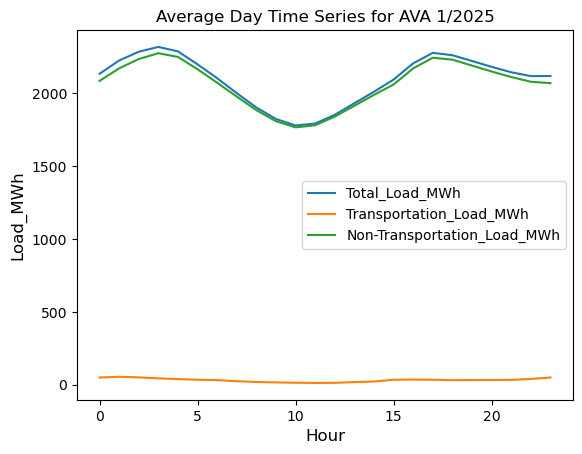

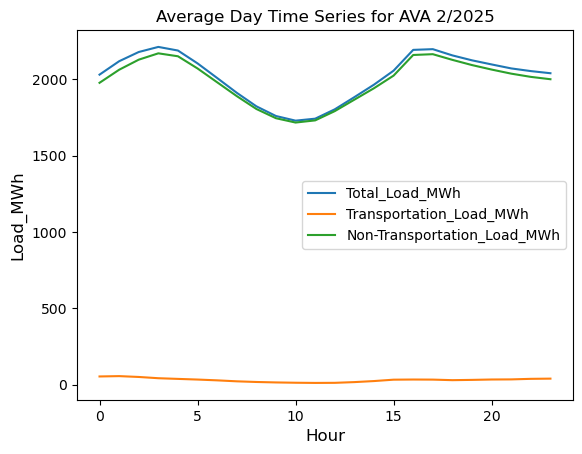

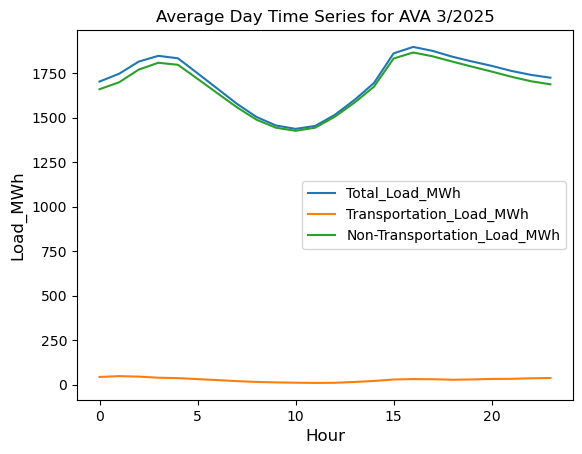

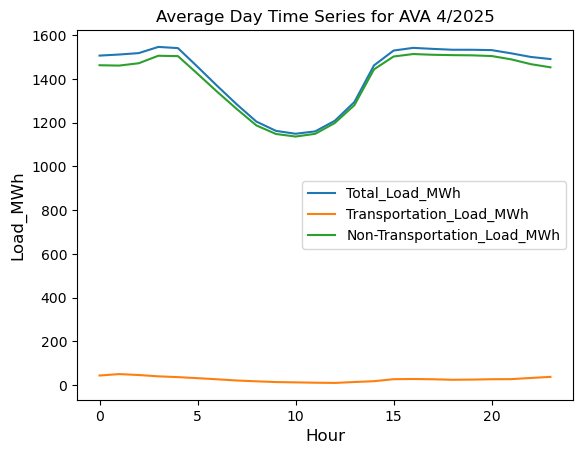

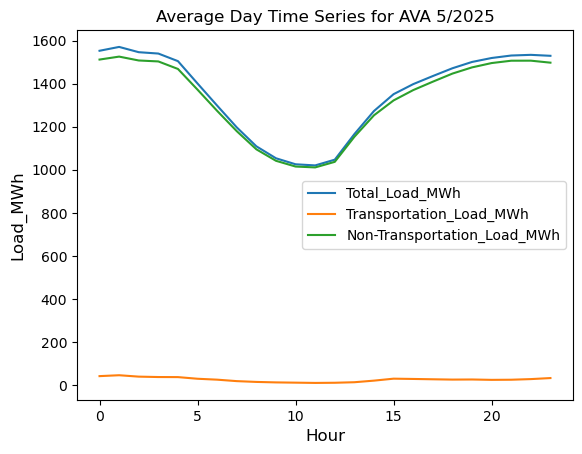

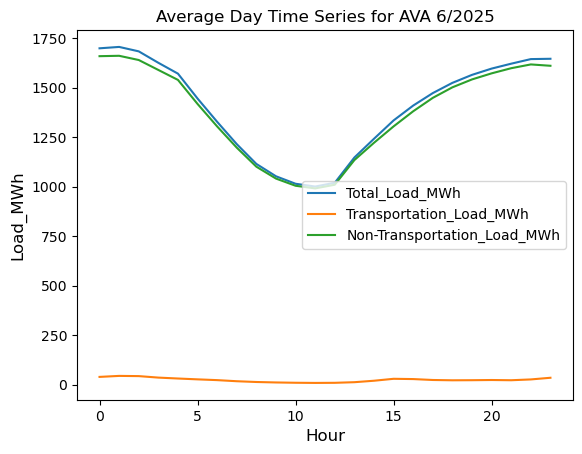

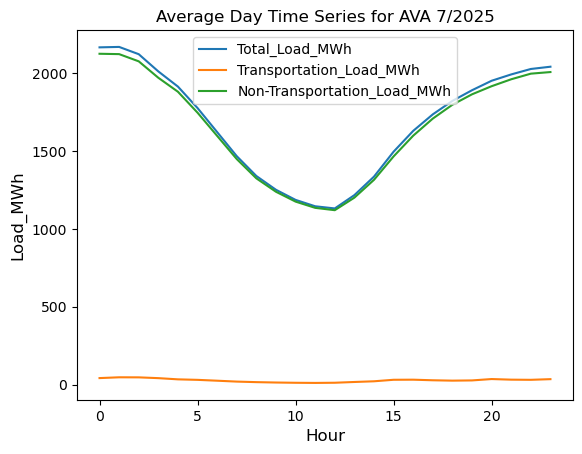

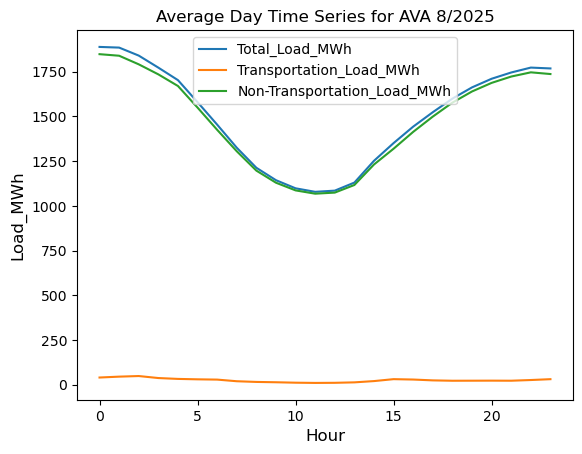

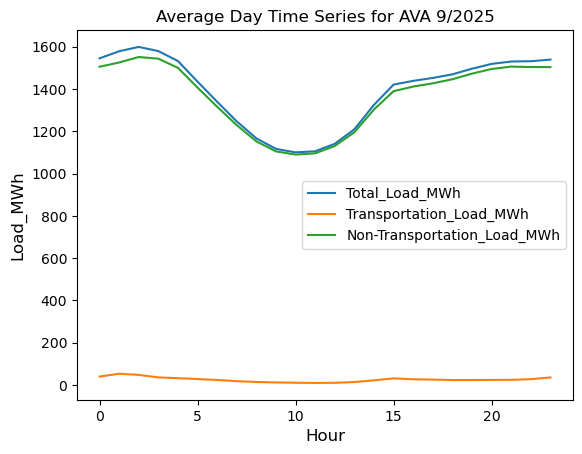

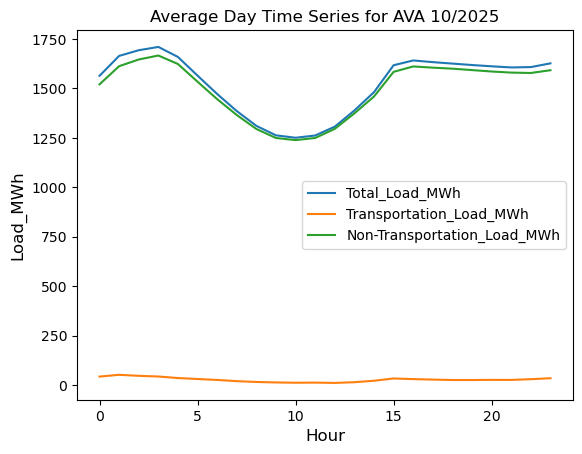

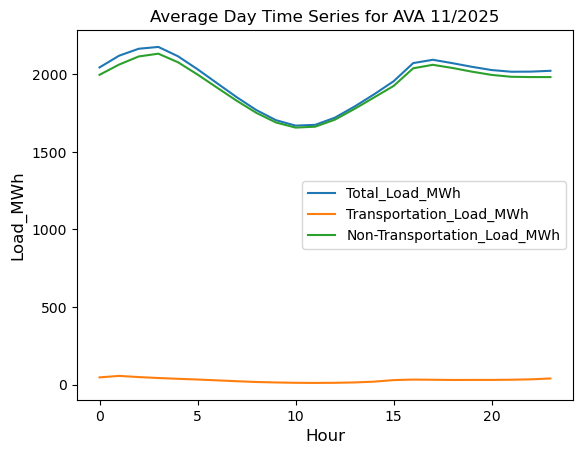

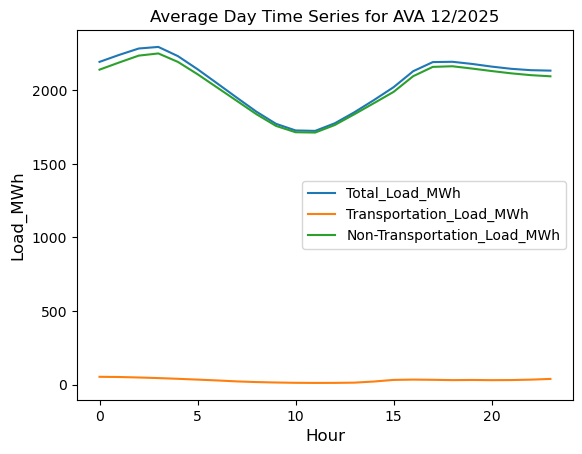

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# One plot scenario        
file = pd.read_csv('Task 3/BAU_Climate_2025_3_data.csv')
badata = file.loc[file['BA'] == 'AVA']
for x in range(1, 13):
    monthly = badata.loc[badata['Month'] == x]
    fig = plt.figure()
    plt.plot(monthly['Hour'], monthly['Total_Load_MWh'], label='Total_Load_MWh')
    plt.plot(monthly['Hour'], monthly['Transportation_Load_MWh'], label='Transportation_Load_MWh')
    plt.plot(monthly['Hour'], monthly['Non-Transportation_Load_MWh'], label='Non-Transportation_Load_MWh')
    plt.ylabel('Load_MWh', fontsize=12)
    plt.xlabel('Hour', fontsize=12)
    plt.title('Average Day Time Series for ' + 'AVA' + ' ' + str(x) + '/' + '2025')
    plt.legend()
    plt.savefig('AVA_month_' + str(x) + '.png')
    plt.show() 